In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
fake_df = pd.read_csv(r'C:\Users\ishan\Desktop\Accenture\archive\News _dataset\Fake.csv')
true_df = pd.read_csv(r'C:\Users\ishan\Desktop\Accenture\archive\News _dataset\True.csv')

In [14]:
fake_df.head(20)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
true_df.head(20)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [6]:
fake_df.shape, true_df.shape

((23481, 4), (21417, 4))

In [7]:
fake_df['label'] = 0
true_df['label'] = 1

In [ ]:
df = pd.concat([fake_df, true_df], axis=0)
df.shape

(44898, 5)

In [10]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [17]:
dup_count = df.duplicated(subset=['title', 'text']).sum()
print(f"Number of duplicate rows based on 'title' and 'text': {dup_count}")

Number of duplicate rows based on 'title' and 'text': 5793


In [18]:
class_counts = df['label'].value_counts()
print('Class Balance: ')
print(class_counts)
print('Class Distribution (%): ')
print(df['label'].value_counts(normalize=True) * 100)

Class Balance: 
label
0    23481
1    21417
Name: count, dtype: int64
Class Distribution (%): 
label
0    52.298543
1    47.701457
Name: proportion, dtype: float64


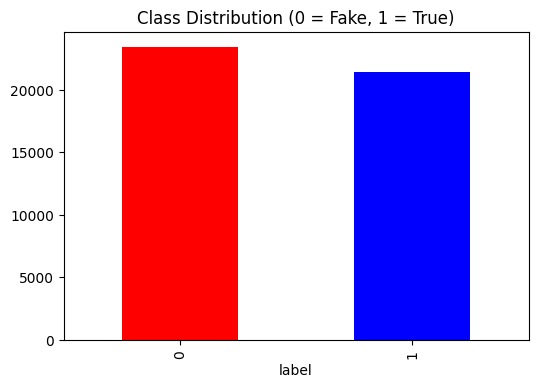

In [19]:
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', title = 'Class Distribution (0 = Fake, 1 = True)', color=['red', 'blue'])
plt.show()

In [22]:
df['word_count'] = df['text'].astype(str).str.split().apply(len)
print('Word Count Stats: \n', df[['word_count']].describe())

Word Count Stats: 
          word_count
count  44898.000000
mean     405.282284
std      351.265595
min        0.000000
25%      203.000000
50%      362.000000
75%      513.000000
max     8135.000000


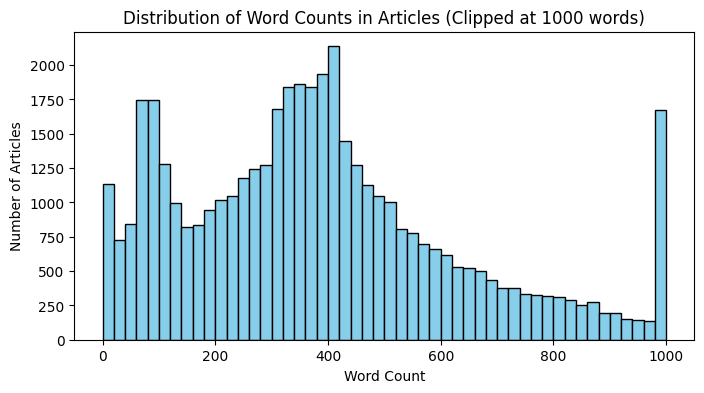

In [23]:
plt.figure(figsize=(8,4))
plt.hist(df['word_count'].clip(upper = 1000), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Articles (Clipped at 1000 words)')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()

In [26]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].astype(str)).toarray()
sum_words = np.array(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame({'word': words, 'count': sum_words}).sort_values(by='count', ascending=False)

In [27]:
print(word_freq)

          word   count
16       trump  134000
12        said  132825
9    president   55892
8       people   41857
13       state   34488
6          new   31311
11     reuters   29425
0      clinton   28695
7        obama   28203
1       donald   28127
2   government   28048
3        house   27753
14      states   26843
10  republican   25568
19        year   24998
4         just   24967
17      united   23601
15        told   23367
5         like   22774
18       white   22745
